<a href="https://colab.research.google.com/github/jvca2000/EX_Dados_Enem/blob/main/dados_enem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [285]:
nome_arquivo1 = '/content/MICRODADOS_ENEM_2021.csv'

Total de participantes por estado

In [286]:
ds_enem = pd.read_csv(nome_arquivo1, encoding = 'ISO-8859-1', sep=';')

In [287]:
ds_enem['SG_UF_PROVA'].unique()

array(['MG', 'AL', 'SP', 'CE', 'RS', 'BA', 'GO', 'RN', 'PA', 'RJ', 'MT',
       'PE', 'MA', 'RO', 'SE', 'PR', 'PB', 'PI', 'ES', 'DF', 'TO', 'AM',
       'SC', 'AP', 'MS', 'RR', 'AC'], dtype=object)

In [288]:
ds_enem['SG_UF_PROVA'].value_counts().index

Index(['CE', 'BA', 'MG', 'SP', 'GO', 'RJ', 'PE', 'PA', 'MA', 'PB', 'PR', 'PI',
       'RS', 'RN', 'ES', 'SE', 'SC', 'DF', 'AL', 'MT', 'TO', 'AM', 'MS', 'AP',
       'RO', 'AC', 'RR'],
      dtype='object')

In [289]:
ds_enem['SG_UF_PROVA'].value_counts().values

array([2776, 2736, 2492, 2485, 2051, 1616, 1471, 1375, 1054,  909,  811,
        779,  748,  692,  523,  499,  427,  418,  397,  353,  253,  242,
        199,  124,  121,   35,   23])

In [290]:
lab = ds_enem['SG_UF_PROVA'].value_counts().index
val = ds_enem['SG_UF_PROVA'].value_counts().values

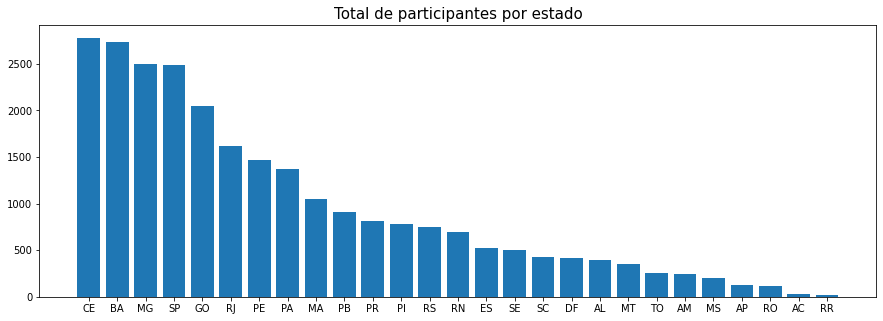

In [291]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(lab, val)
ax.set_title('Total de participantes por estado', fontsize=15)
plt.show()

Quantidade de participantes por faixa etária ENEM 2021

In [292]:
nome_arquivo2 = pd.read_excel(r"/content/Dicionário_Microdados_Enem_2021.xlsx",)

In [293]:
qt_alunos = ds_enem['TP_FAIXA_ETARIA'].value_counts()

In [294]:
faixa_etaria_enem = nome_arquivo2.loc[6:25]

In [295]:
faixa_etaria_final = faixa_etaria_enem.dropna(axis = 'columns')
faixa_etaria_final

,Unnamed: 2,Unnamed: 3
6,1,Menor de 17 anos
7,2,17 anos
8,3,18 anos
9,4,19 anos
10,5,20 anos
11,6,21 anos
12,7,22 anos
13,8,23 anos
14,9,24 anos
15,10,25 anos


In [296]:
faixa_etaria_renomeada = faixa_etaria_final.rename(columns={'Unnamed: 2':'Categoria', 'Unnamed: 3':'faixa_etaria'})

In [297]:
df_merge = pd.merge(faixa_etaria_renomeada, qt_alunos, left_on = 'Categoria', right_index = True)

In [298]:
df_merge = df_merge.rename(columns={'TP_FAIXA_ETARIA':'quantidade_alunos'})

In [299]:
df_merge = df_merge.reset_index(drop=True)

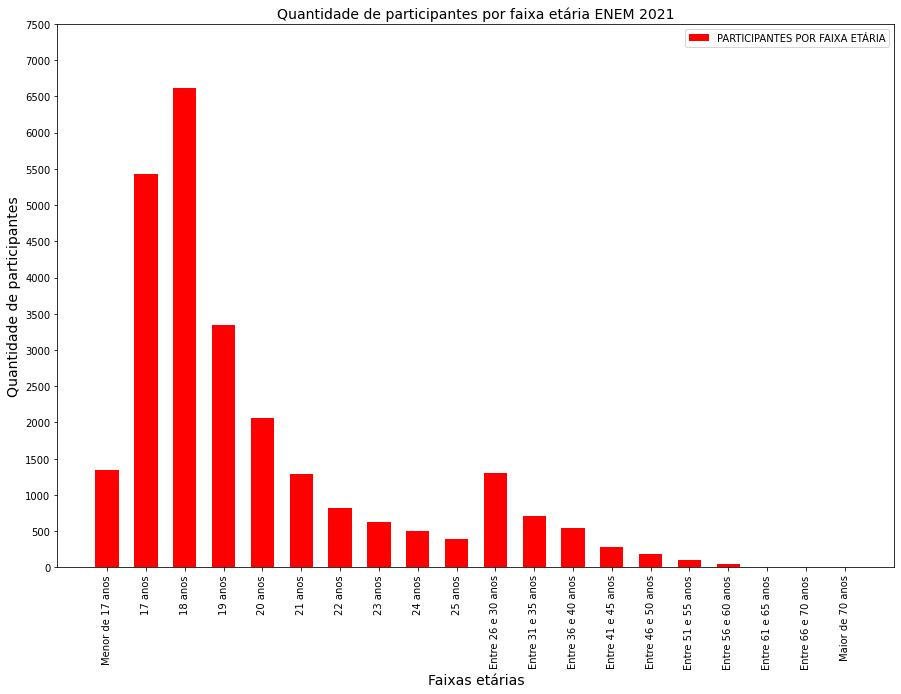

In [300]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(range(len(df_merge['faixa_etaria'])), list(df_merge['quantidade_alunos']), width=0.6, tick_label = list(df_merge['faixa_etaria']), color = "red", label = "PARTICIPANTES POR FAIXA ETÁRIA")
plt.yticks(np.arange(0, 8000, 500))
plt.xticks(range(len(df_merge['faixa_etaria'])), rotation='vertical')
ax.set_title("Quantidade de participantes por faixa etária ENEM 2021", fontsize=14)
ax.set_ylabel("Quantidade de participantes", fontsize=14)
ax.set_xlabel("Faixas etárias", fontsize=14)
ax.legend()
plt.show()